<a href="https://colab.research.google.com/github/auliyatara/plant-image-retrieval/blob/main/tugas5/hi_color_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Tugas5tkc/Tugas5"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/Tugas5tkc/Tugas5

/content/drive/My Drive/Tugas5tkc/Tugas5


In [ ]:
!ls

kaggle.json


In [ ]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

 98% 157M/161M [00:01<00:00, 109MB/s]
100% 161M/161M [00:01<00:00, 97.2MB/s]


In [ ]:
!ls

corn-or-maize-leaf-disease-dataset.zip	kaggle.json


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

data  kaggle.json


In [ ]:
!ls data

Blight	Common_Rust  Gray_Leaf_Spot  Healthy


In [ ]:
!pip install split-folders

###hi_color_correction

In [ ]:
# import the necessary packages
from imutils.perspective import four_point_transform
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
def find_color_card(image):
	# load the ArUCo dictionary, grab the ArUCo parameters, and
	# detect the markers in the input image
	arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
	arucoParams = cv2.aruco.DetectorParameters_create()
	(corners, ids, rejected) = cv2.aruco.detectMarkers(image,
		arucoDict, parameters=arucoParams)

	# try to extract the coordinates of the color correction card
	try:
		# otherwise, we've found the four ArUco markers, so we can
		# continue by flattening the ArUco IDs list
		ids = ids.flatten()

		# extract the top-left marker
		i = np.squeeze(np.where(ids == 923))
		topLeft = np.squeeze(corners[i])[0]

		# extract the top-right marker
		i = np.squeeze(np.where(ids == 1001))
		topRight = np.squeeze(corners[i])[1]

		# extract the bottom-right marker
		i = np.squeeze(np.where(ids == 241))
		bottomRight = np.squeeze(corners[i])[2]

		# extract the bottom-left marker
		i = np.squeeze(np.where(ids == 1007))
		bottomLeft = np.squeeze(corners[i])[3]

	# we could not find color correction card, so gracefully return
	except:
		return None

	# build our list of reference points and apply a perspective
	# transform to obtain a top-down, birds-eye-view of the color
	# matching card
	cardCoords = np.array([topLeft, topRight,
		bottomRight, bottomLeft])
	card = four_point_transform(image, cardCoords)

	# return the color matching card to the calling function
	return card

In [ ]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "reference": "/content/drive/My Drive/Tugas5tkc/Tugas5/data/Gray_Leaf_Spot/Corn_Gray_Spot (37).jpg",
    "input": "/content/drive/My Drive/Tugas5tkc/Tugas5/data/Gray_Leaf_Spot/Corn_Gray_Spot (46).jpg"
}

[INFO] loading images...


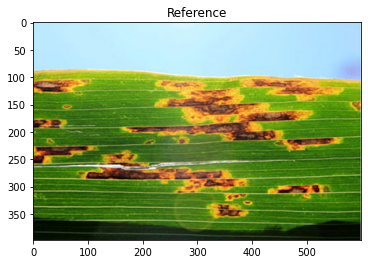

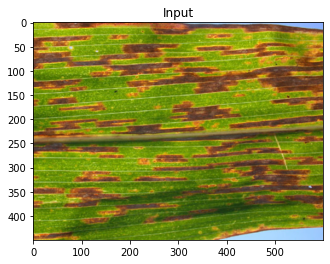

In [ ]:
# load the reference image and input images from disk
print("[INFO] loading images...")
ref = cv2.imread(args["reference"])
image = cv2.imread(args["input"])

# resize the reference and input images
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display the reference and input images to our screen
plt_imshow("Reference", ref)
plt_imshow("Input", image)

In [ ]:
# find the color matching card in each image
print("[INFO] finding color matching cards...")
refCard = find_color_card(ref)
imageCard = find_color_card(image)

# if the color matching card is not found in either the reference
# image or the input image, gracefully exit
if refCard is None or imageCard is None:
	print("[INFO] could not find color matching card in both images")

[INFO] finding color matching cards...
[INFO] could not find color matching card in both images


In [ ]:
# show the color matching card in the reference image and input image,
# respectively
plt_imshow("Reference Color Card", refCard)
plt_imshow("Input Color Card", imageCard)

# apply histogram matching from the color matching card in the
# reference image to the color matching card in the input image
print("[INFO] matching images...")
imageCard = exposure.match_histograms(imageCard, refCard,
	multichannel=True)

# show our input color matching card after histogram matching
plt_imshow("Input Color Card After Matching", imageCard)

error: ignored